In [1]:
import os, rcmd, sys, plot_syn
%matplotlib inline

In [2]:
rcmd.run_command('./createdir_example_synthetic.sh')

0

In [3]:
cd tool_intro/example_synthetic/

/home/michael/esa_demo_new.git/tool_intro/example_synthetic


In [4]:
ls -ralt

total 64
-rw-r--r-- 1 michael users   499 Apr  1 10:23 README-DERIVATIVES.txt
-rw-r--r-- 1 michael users   390 Apr  1 10:23 readme
-rw-r--r-- 1 michael users   146 Apr  1 10:23 Make-local.inc
-rw-r--r-- 1 michael users 19296 Apr  1 10:23 Makefile
drwxr-xr-x 2 michael users  4096 Apr  1 10:23 eispack/
drwxr-xr-x 2 michael users  4096 Apr  1 10:23 driver/
drwxr-xr-x 2 michael users  4096 Apr  1 10:23 bin/
drwxr-xr-x 3 michael users  4096 Apr  1 10:23 ../
drwxr-xr-x 8 michael users  4096 Apr  1 10:23 src/
drwxr-xr-x 2 michael users  4096 Apr  1 10:23 lbfgsb/
drwxr-xr-x 2 michael users  4096 Apr  1 10:23 input/
drwxr-xr-x 8 michael users  4096 Apr  1 10:23 ./


In [5]:
# terminate the installation
rcmd.run_command('make setup')

bin/rs_setup.py
------------------------------
 Retrieval System Setup properly finished, Retrieval System ready for use!
------------------------------


0

In [6]:
ls -ralt input/

total 76
-rw-r--r-- 1 michael users   266 Apr  1 10:23 target_schedule_2017.txt
-rw-r--r-- 1 michael users 24961 Apr  1 10:23 mni_stat_jules_2017.csv
-rw-r--r-- 1 michael users  6464 Apr  1 10:23 mni_s2_508_med_2017.csv
-rw-r--r-- 1 michael users 18964 Apr  1 10:23 mni_s1_508_med_2017.csv
drwxr-xr-x 8 michael users  4096 Apr  1 10:23 ../
lrwxrwxrwx 1 michael users    84 Apr  1 10:24 s2a.srf -> /home/michael/.local/lib/python2.7/site-packages/signaturesimulator/data/srf/s2a.srf
lrwxrwxrwx 1 michael users    89 Apr  1 10:24 ASTMG173.csv -> /home/michael/.local/lib/python2.7/site-packages/signaturesimulator/data/srf/ASTMG173.csv
drwxr-xr-x 2 michael users  4096 Apr  1 10:24 ./


In [7]:
cat ../mk.complete.txt

complete: simulate.x runretrieval.x
	$(MAKE) clean_exp
	$(MAKE) presynthetic
	$(MAKE) synthetic
	$(MAKE) retrieval
	$(MAKE) save_exp SAVDIR=resdir_$(EXPV)_$@


In [8]:
rcmd.run_command('make simulate.x runretrieval.x')

gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/mo_sensimul_s1.o src/sense/mo_sensimul_s1.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/mo_sensimul_s2.o src/semid/mo_sensimul_s2.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/install-4.3.1/include -Jobjs -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native  -c -o objs/mo_sensimul.o src/simulator/mo_sensimul.f90
gfortran -Wall -ffixed-line-length-132 -fdefault-real-8 -fdefault-double-8 -I/usr/include -Iobjs -I/home/users/db903833/src/netcdf/inst

0

In [9]:
cat ../mk.pre.txt


pregeneral:
	$(MAKE) pre PRE_MODE=pre_general
.PHONY: pregeneral

presynthetic:
	$(MAKE) pre PRE_MODE=pre_synthetic
.PHONY: presynthetic


pre:
	( args="";   \
          if [ "x$(PRE_MODE)" = "xpre_synthetic" ]; then \
            args="--time_start $(TIMSTART) --time_end $(TIMEND)"; \
            if [ "x$(NOXTGT)" = "x" ]; \
            then \
              args="$${args} --target_schedule $(TGTSCHEDULE_FILE)"; \
            fi; \
	    if [ "x$(MISSION_LST)" != "x" ]; \
            then \
	      args="$${args} --mission_lst $(MISSION_LST)"; \
            fi; \
          fi; \
          args="$${args} $(PREARGXTRA)"; \
	  $(RS_PRE_TOOL) $(PRE_MODE) $${args} 2>&1 | tee mk.$@.log; \
        )

RS_PRE_TOOL     := bin/rs_pre.py
TIMSTART        := 20170501
TIMEND          := 20170531
TGTSCHEDULE_FILE := input/target_schedule_2017.txt


In [10]:
rcmd.run_command('bin/rs_pre.py pre_synthetic -h')

2019-04-01 10:28:16,342 INFO::<module>:: rs_pre.py::PROGRAM START::2019-04-01T10:28:16.342858
2019-04-01 10:28:16,342 INFO::<module>:: command-line: bin/rs_pre.py pre_synthetic -h
usage: ==================================================
PROJECT

Sentinel Synergy Study (S^3)

DESCRIPTION

Retrieval System Preprocessor

Implements/Provides all preprocessing steps required to operate the retrieval
prototype system

EXAMPLES

available options are listed by invoking 'rs_pre.py -h' on the command line

EXIT STATUS

should be 0 in case of success, 1 otherwise

AUTHOR

The Inversion Lab, Michael Vossbeck <Michael.Vossbeck@Inversion-Lab.com>

================================================== pre_synthetic
       [-h] [--time_start TIME_START] [--time_end TIME_END] [--target_select target_tmin target_tmax target_tdelta]
       [--target_schedule TARGET_SCHEDULE] [--site_nml SITE_NML] [--use_generic_prior] [--prior_inifile PRIOR_INIFILE]
       [--mission_lst {S1A,S1B,S2A,S2B} [{S1A,S1B,S2A,S2

0

In [11]:
cat input/target_schedule_2017.txt

#selected points of time for target processor fmt='%Y%m%dT%H:%M:%S'
20170510T12:00:00
20170511T12:00:00
20170512T12:00:00
20170513T12:00:00
20170514T12:00:00
20170515T12:00:00
20170516T12:00:00
20170517T12:00:00
20170518T12:00:00
20170519T12:00:00
20170520T12:00:00


In [12]:
rcmd.run_command('./runretrieval.x --help')


STOP 0

 available options:
  --dbglev         increase level of verbosity
  --no_targets     disable target retrievals (Note: In particular, FAPAR retrieval may be time-consuming)




0

In [15]:
rcmd.run_command('make presynthetic MISSION_LST="S1A S1B S2A S2B"')

make pre PRE_MODE=pre_synthetic
make[1]: Entering directory '/home/michael/esa_demo_new.git/tool_intro/example_synthetic'
( args="";   \
          if [ "xpre_synthetic" = "xpre_synthetic" ]; then \
            args="--time_start 20170501 --time_end 20170531"; \
            if [ "x" = "x" ]; \
            then \
              args="${args} --target_schedule input/target_schedule_2017.txt"; \
            fi; \
    if [ "xS1A S1B S2A S2B" != "x" ]; \
            then \
      args="${args} --mission_lst S1A S1B S2A S2B"; \
            fi; \
          fi; \
          args="${args} "; \
  bin/rs_pre.py pre_synthetic ${args} 2>&1 | tee mk.pre.log; \
        )
2019-04-01 10:30:52,047 INFO::<module>:: rs_pre.py::PROGRAM START::2019-04-01T10:30:52.047078
2019-04-01 10:30:52,047 INFO::<module>:: command-line: bin/rs_pre.py pre_synthetic --time_start 20170501 --time_end 20170531 --target_schedule input/target_schedule_2017.txt --mission_lst S1A S1B S2A S2B
2019-04-01 10:30:52,051 INFO::main:: user

0

In [16]:
ls -ralt

total 1920
-rw-r--r--  1 michael users     499 Apr  1 10:23 README-DERIVATIVES.txt
-rw-r--r--  1 michael users     390 Apr  1 10:23 readme
-rw-r--r--  1 michael users     146 Apr  1 10:23 Make-local.inc
-rw-r--r--  1 michael users   19296 Apr  1 10:23 Makefile
drwxr-xr-x  2 michael users    4096 Apr  1 10:23 driver/
drwxr-xr-x  2 michael users    4096 Apr  1 10:23 bin/
drwxr-xr-x  8 michael users    4096 Apr  1 10:23 src/
drwxr-xr-x  2 michael users    4096 Apr  1 10:24 input/
drwxr-xr-x  3 michael users    4096 Apr  1 10:26 ../
-rwxr-xr-x  1 michael users  291144 Apr  1 10:27 simulate.x*
drwxr-xr-x  2 michael users    4096 Apr  1 10:27 objs/
drwxr-xr-x  2 michael users    4096 Apr  1 10:27 lbfgsb/
drwxr-xr-x  2 michael users    4096 Apr  1 10:27 eispack/
drwxr-xr-x  2 michael users    4096 Apr  1 10:27 lib/
-rwxr-xr-x  1 michael users 1483288 Apr  1 10:27 runretrieval.x*
-rw-r--r--  1 michael users    1056 Apr  1 10:30 site.nml
-rw-r--r--  1 michael users   17499 Apr  1 10:30 retrconf

In [17]:
cat site.nml

&site_params
    !location
    lat = 12.88  !latitude of site
    lon = 48.684  !longitude of site

    !soil characteristics
    clay = 0.23  !fraction soil texture clay
    sand = 0.27  !fraction soil texture sand
    bulk = 1.65  !soil bulk density (g cm-3)

    !microwave sense params
    freq = 5.405  !frequency (GHz)
    s = 0.015  !surface rms height (m)
    lai_coeff_kv = 0.1  !coefficient of lai for which to calculate extinction and volume scattering coefficients in V pol.
    lai_coeff_kh = 0.1  !coefficient of lai for which to calculate extinction and volume scattering coefficients in H pol.
    omega = 0.1  !coefficient for calculation of volume scattering coefficients

    !optical semi discrete params
    mode = 'fast'  !mode to run semiDiscrete in 'fast' or 'slow'
    rsl1 = 0.2  !weight of the first soil vector, default: 0.2
    sm_coeff = 0.5  !weighting of soil moisture impact, bound between (0,1)
    cab = 75.0  !leaf chlorophyl concentration, default: 75.0
    cw = 

In [18]:
cat retrctl.nml

&RETRCTL
  retr_use_prior_term = .true. ! if .true. then J_p included in Eq. 1.5
  retr_use_model_term = .true. ! if .true. then J_m included in Eq. 1.5
  gradient_tol = 1.000000e-05 ! stopping criterion for minimisation: rel. reduction in gradient norm
  prior_pert = 2.500000e-01 ! initial guess will be the prior times (1+prior_pert)
/


In [19]:
cat ../mk.complete.txt

complete: simulate.x runretrieval.x
	$(MAKE) clean_exp
	$(MAKE) presynthetic
	$(MAKE) synthetic
	$(MAKE) retrieval
	$(MAKE) save_exp SAVDIR=resdir_$(EXPV)_$@


In [20]:
rcmd.run_command('make synthetic -n')

rm -f obs_s1.nc obs_s2.nc
./simulate.x  2>&1 | tee mk.synthetic.log
if [ -f sensimul_s1.nc ]; then mv sensimul_s1.nc obs_s1.nc; fi; \
 if [ -f sensimul_s2.nc ]; then mv sensimul_s2.nc obs_s2.nc; fi


0

In [21]:
rcmd.run_command('make synthetic')

./simulate.x  2>&1 | tee mk.synthetic.log
 INFO::runsim:calling initf...
 DEBUG::load_ivgeom:ndims= 2
 INFO::initf:retrieval configuration was read from ***retrconfig.nc***
 DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  30 npts_s1=  17 npts_s2=   2
 INFO::load_sitenml:successfully read site namelist file ***site.nml***
 INFO::setprior:prior control vector was read from ***retrprior.nc***
 DEBUG::setprior:ncrd_retrieval_prior terminated successfully
 INFO::runsim:...done.
 DEBUG::runsim:initf yields:n= 92 m= 60
 INFO::runsim:calling initx...
 INFO::runsim:...DONE.
 DEBUG::runsim::calling simulate_s1s2 at x ...
  j     x-physical       x-scaled        x-sigma
  1     0.10000000     1.00000000     0.10000000
  2     0.10000000     1.00000000     0.10000000
  3     0.00284149     2.00000000     0.00142075
  4     0.01342839     2.00000000     0.00671420
  5     0.28455981     2.00000000     0.14227991
  6     0.00627885     2.00000000     0.00313942
  7     0.03541716     

0

In [22]:
ls -ralt

total 1960
-rw-r--r--  1 michael users     499 Apr  1 10:23 README-DERIVATIVES.txt
-rw-r--r--  1 michael users     390 Apr  1 10:23 readme
-rw-r--r--  1 michael users     146 Apr  1 10:23 Make-local.inc
-rw-r--r--  1 michael users   19296 Apr  1 10:23 Makefile
drwxr-xr-x  2 michael users    4096 Apr  1 10:23 driver/
drwxr-xr-x  2 michael users    4096 Apr  1 10:23 bin/
drwxr-xr-x  8 michael users    4096 Apr  1 10:23 src/
drwxr-xr-x  2 michael users    4096 Apr  1 10:24 input/
drwxr-xr-x  3 michael users    4096 Apr  1 10:26 ../
-rwxr-xr-x  1 michael users  291144 Apr  1 10:27 simulate.x*
drwxr-xr-x  2 michael users    4096 Apr  1 10:27 objs/
drwxr-xr-x  2 michael users    4096 Apr  1 10:27 lbfgsb/
drwxr-xr-x  2 michael users    4096 Apr  1 10:27 eispack/
drwxr-xr-x  2 michael users    4096 Apr  1 10:27 lib/
-rwxr-xr-x  1 michael users 1483288 Apr  1 10:27 runretrieval.x*
-rw-r--r--  1 michael users    1056 Apr  1 10:30 site.nml
-rw-r--r--  1 michael users   17499 Apr  1 10:30 retrconf

In [23]:
rcmd.run_command('make retrieval -n')

./runretrieval.x  2>&1 | tee mk.retrieval.log


0

In [20]:
rcmd.run_command('./runretrieval.x --help')



available options:
--dbglev         increase level of verbosity
--no_targets     disable target retrievals (Note: In particular, FAPAR retrieval may be time-consuming)




0

In [24]:
rcmd.run_command('make retrieval')

./runretrieval.x  2>&1 | tee mk.retrieval.log
 INFO::retrieval_read_ctl:read settings from file ***retrctl.nml***...
 INFO::retrieval_read_ctl:...reading done.
 INFO::use_prior_term: T
 INFO::use_state_term: T
 INFO::gradient_tolerance: .10000E-04
 INFO::prior_pert: .25000E+00
 INFO::runretrieval:will apply relative perturbation of prior with pert=  0.25
 INFO::runretrieval:calling initf...
 DEBUG::load_ivgeom:ndims= 2
 INFO::initf:retrieval configuration was read from ***retrconfig.nc***
 DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  30 npts_s1=  17 npts_s2=   2
 INFO::load_sitenml:successfully read site namelist file ***site.nml***
 INFO::setprior:prior control vector was read from ***retrprior.nc***
 DEBUG::setprior:ncrd_retrieval_prior terminated successfully
 INFO::runretrieval:...done.
 DEBUG::runretrieval:initf yields:n= 92 mf= 60
 INFO::runretrieval:calling initx...
 INFO::runretrieval:...done.
 INFO::state_model_set:will be setting-up simple state-model of typ

0

In [25]:
rcmd.run_command('make save_exp SAVDIR=ex_complete')

if [ "xex_complete" != "x" ]; then \
          mkdir -p ex_complete; \
          rm -f ex_complete/*; \
          for f in `echo retrconfig.nc retrprior.nc retrmodel.nc retrctl.nml site.nml retrctlvecbounds.nml x.b sx.b fort.[0-9] fort.[0-9][0-9] sensimul_s?.nc sensimul_s?.b sensimul.b x.b sx.b iterate.dat Cx.b sigma.dat xrunua.log sigma.dat mk.pre.log iterate.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_post.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.retrieval.log sigma.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_poast.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.mba.log obs_s1.nc obs_s2.nc simulation.nc mk.synthetic.log`; \
          do \
    if [ -f ${f} ]; \
            then \
              cp -a ${f} ex_complete; \
            fi; \
          done; \
        fi;


0

(<matplotlib.figure.Figure at 0x7f18c19a55d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18c1b38f10>)

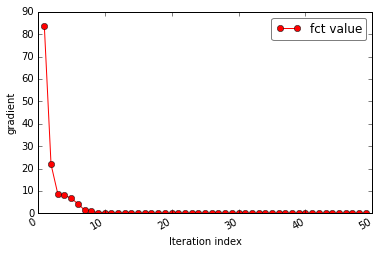

In [32]:
plot_syn.plot_iterate('ex_complete/iterate.dat', var='fct')

(<matplotlib.figure.Figure at 0x7f18bf8cf490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18bf8cf750>)

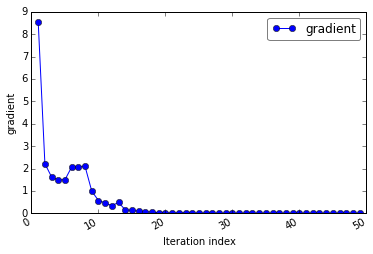

In [33]:
plot_syn.plot_iterate('ex_complete/iterate.dat', var='grad')

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


(<matplotlib.figure.Figure at 0x7f18bf815110>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18bf815690>)

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


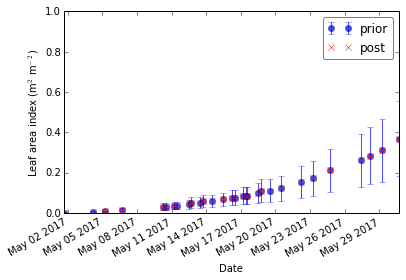

In [34]:
plot_syn.plot_state('lai', _dir='ex_complete')